The description clearly declares that this is a highle imbalanced dataset. The no. of entry is 284807 and among them only 492 are fraud cases. In this kernel I want to present a comparative analysis of the data and performance of three models, i.e., Naive Bayes, XGBoost and Logistic Regression to see which one gives better accuracy. Though the features are scaled for dimention reduction and the names of the features are not given due to privacy issues, we can still analyze some important aspects of the dataset. Let's import the usual libraries: 

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,auc,roc_auc_score, classification_report
%matplotlib inline

In [2]:
df= pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

We can see there are no null values. So there wll be no need of imputation. Now let's see how the label is distributed over the dataset. I am using a simple countplot to show how imbalanced the data set is.

([<matplotlib.axis.XTick at 0x10a1d70f0>,
 <a list of 2 Text xticklabel objects>)

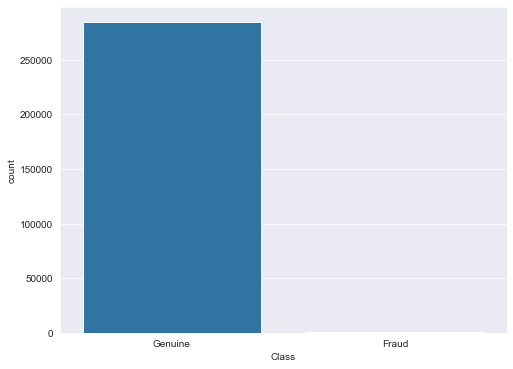

In [6]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= 'Class', data= df)
Labels= ('Genuine', 'Fraud')
plt.xticks(range(2), Labels)

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

It is clearly visible that the data is highly imbalanced. In this kind of cases it is probable to have a overfitting model which thinks most of the classes will be genuine transactions. But that is definitely not the case. We don't want such models clearly as it is not good for business, right!? We can show how the transaction rate varies for the genuine and fraud classes. It is noticable that transactions taking up different times are almost same in both cases, so may be time doesn't have much of an effect in this case.

Time in between the transactions: 
0    0.000000
1    0.000000
2    0.000278
3    0.000278
4    0.000556
Name: Time_hr, dtype: float64


Text(0, 0.5, '# transactions')

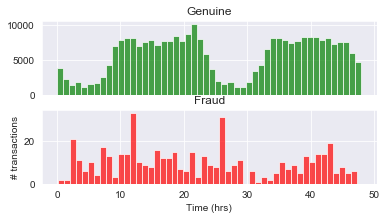

In [8]:
#plot Time to see if there is any trend

print("Time in between the transactions: ")
df["Time_hr"] = df["Time"]/3600 # convert to hours
print(df["Time_hr"].head())
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,3))
ax1.hist(df.Time_hr[df.Class==0],bins=50,color='g',alpha=0.7)
ax1.set_title('Genuine')
plt.xlabel('Time (hrs)')
plt.ylabel('# transactions')
ax2.hist(df.Time_hr[df.Class==1],bins=50,color='r',alpha=0.7)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('# transactions')

I will drop the "Time" column and keep the "Time_hr".

In [9]:
df = df.drop(['Time'],axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_hr
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000278
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000278
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000556


In [10]:
cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index('Time_hr')))
df = df.reindex(columns= cols)
df.head(10)

,Time_hr,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,0.000556,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,0.001111,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,0.001944,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,0.001944,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,0.002500,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Let's check the transaction amounts. We see amounts in fraud cases are relatively low than genuine cases.  

Text(0, 0.5, 'No. of transactions')

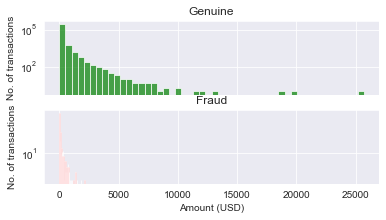

In [11]:
fig, (ax3,ax4) = plt.subplots(2,1, figsize = (6,3), sharex = True)
ax3.hist(df.Amount[df.Class==0],bins=50,color='g',alpha=0.7)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Genuine') # to see the tails
ax3.set_ylabel('No. of transactions')
ax4.hist(df.Amount[df.Class==1],bins=50,color='r',alpha=0.7)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('Amount (USD)')
ax4.set_ylabel('No. of transactions')

Now I want to scale the Time and Amount data. We don't need to do that for other columns as those are already scaled. 

In [12]:
from sklearn.preprocessing import StandardScaler
df['scaled_Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = StandardScaler().fit_transform(df['Time_hr'].values.reshape(-1,1))
df = df.drop(['Amount', 'Time_hr'],axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_Amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [13]:
scaled_amount = df['scaled_Amount']
scaled_time = df['scaled_time']

df.drop(['scaled_Amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_Amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_Amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


To check the correlation between the features are made easy by creating the heat map below. We can see not many of the features have profound effect on the labels. Most of the correlations are around 0.0

In [14]:
correlation= df.corr()

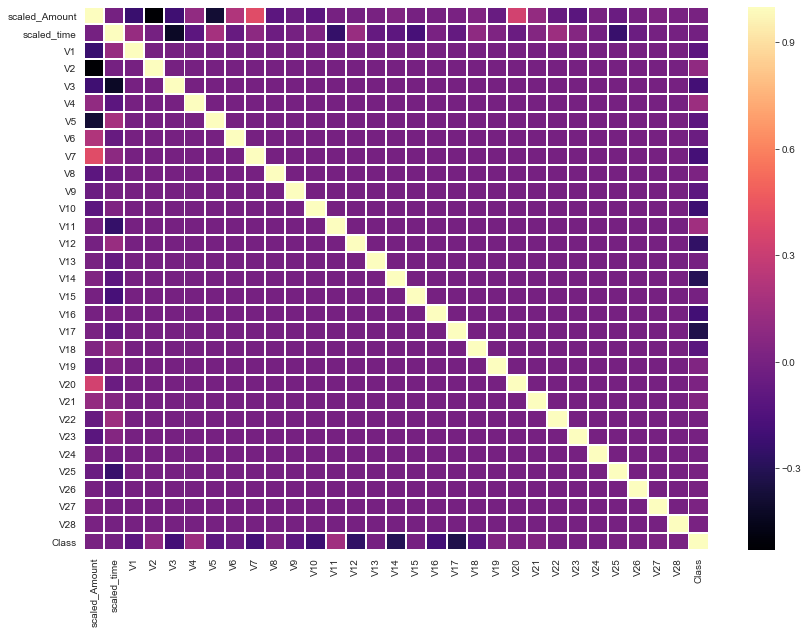

In [15]:
plt.figure(figsize=(14, 10))
sns.heatmap(correlation, cmap="magma", linecolor='white',linewidths=1)

Now let's define some functions to make our tasks easier in the upcoming steps. I am defining three functions for splitting the dataset, taking the classifier and fitting it to the train data and to print the accuracy metrics. 

In [16]:
def train_test_split(df, dropped_columns):
    df = df.drop(dropped_columns,axis=1)
    print(df.columns)
    
    from sklearn.model_selection import train_test_split
    
    y = df['Class']  #Labels
    X = df.drop(['Class'],axis= 1) #Variables
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 101)

    print("train set size: ", len(y_train), "\n test set size: ", len(y_test))
    print("fraud transactions in test set: ", sum(y_test))
    return X_train, X_test, y_train, y_test

In [17]:
def model_predictions(classifier, X_train, y_train, X_test):
    # create classifier
    classifier = classifier
    
    # fit it to training data
    classifier.fit(X_train,y_train)
    
    # predict using test data
    y_pred = classifier.predict(X_test)
    
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = classifier.predict_proba(X_test)
    
    return y_pred, y_pred_prob

In [18]:
def print_metrics(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print('Classification Report:\n', classification_report(y_test, y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

Now let's apply the models without dropping any feature.

### Case-1.1 : Naive Bayes without dropping columns

In [19]:
from sklearn.naive_bayes import GaussianNB
dropped_columns = []
X_train, X_test, y_train, y_test = train_test_split(df, dropped_columns)
y_pred, y_pred_prob = model_predictions(GaussianNB(), X_train, y_train, X_test)
print_metrics(y_test,y_pred,y_pred_prob)

Index(['scaled_Amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'Class'],
      dtype='object')
train set size:  213605 
 test set size:  71202
fraud transactions in test set:  125
test-set confusion matrix:
 [[69498  1579]
 [   20   105]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     71077
           1       0.06      0.84      0.12       125

    accuracy                           0.98     71202
   macro avg       0.53      0.91      0.55     71202
weighted avg       1.00      0.98      0.99     71202

ROC AUC: 0.953311197715154


### Case-1.2 : XGBoost without dropping columns

In [20]:
from xgboost import XGBClassifier
dropped_columns = []
X_train, X_test, y_train, y_test = train_test_split(df, dropped_columns)
y_pred, y_pred_prob = model_predictions(XGBClassifier(), X_train, y_train, X_test)
print_metrics(y_test,y_pred,y_pred_prob)

Index(['scaled_Amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'Class'],
      dtype='object')
train set size:  213605 
 test set size:  71202
fraud transactions in test set:  125
test-set confusion matrix:
 [[71069     8]
 [   26    99]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71077
           1       0.93      0.79      0.85       125

    accuracy                           1.00     71202
   macro avg       0.96      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202

ROC AUC: 0.9764970947001139


### Case-1.3 : Logistic Regression without dropping columns

In [21]:
from sklearn.linear_model import LogisticRegression
dropped_columns = []
X_train, X_test, y_train, y_test = train_test_split(df, dropped_columns)
y_pred, y_pred_prob = model_predictions(LogisticRegression(C = 0.01), X_train, y_train, X_test)
print_metrics(y_test,y_pred,y_pred_prob)

Index(['scaled_Amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'Class'],
      dtype='object')
train set size:  213605 
 test set size:  71202
fraud transactions in test set:  125
test-set confusion matrix:
 [[71070     7]
 [   51    74]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71077
           1       0.91      0.59      0.72       125

    accuracy                           1.00     71202
   macro avg       0.96      0.80      0.86     71202
weighted avg       1.00      1.00      1.00     71202

ROC AUC: 0.9819954134248773


It is clearly visible that the recall and f1-scores are not upto the mark in all of the cases. These models having tough times predicting the fraud cases ! Let's see if anything changes if we drop some features.

Now we will check the model performance by dropping most irrelevent columns.

### Case- 2.1: Naive Bayes with dropping columns

In [22]:
dropped_columns = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V10','V9','V8']
X_train, X_test, y_train, y_test = train_test_split(df, dropped_columns)
y_pred, y_pred_prob = model_predictions(GaussianNB(), X_train, y_train, X_test)
print_metrics(y_test,y_pred,y_pred_prob)

Index(['scaled_Amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')
train set size:  213605 
 test set size:  71202
fraud transactions in test set:  125
test-set confusion matrix:
 [[70065  1012]
 [   19   106]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     71077
           1       0.09      0.85      0.17       125

    accuracy                           0.99     71202
   macro avg       0.55      0.92      0.58     71202
weighted avg       1.00      0.99      0.99     71202

ROC AUC: 0.959314602473374


### Case-2.2 : XGBoost with dropping columns  

In [23]:
dropped_columns = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V10','V9','V8']
X_train, X_test, y_train, y_test = train_test_split(df, dropped_columns)
y_pred, y_pred_prob = model_predictions(XGBClassifier(), X_train, y_train, X_test)
print_metrics(y_test,y_pred,y_pred_prob)

Index(['scaled_Amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')
train set size:  213605 
 test set size:  71202
fraud transactions in test set:  125
test-set confusion matrix:
 [[71070     7]
 [   23   102]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71077
           1       0.94      0.82      0.87       125

    accuracy                           1.00     71202
   macro avg       0.97      0.91      0.94     71202
weighted avg       1.00      1.00      1.00     71202

ROC AUC: 0.9758868269623084


### Case-2.3 : Logistic Regression with dropping columns

In [24]:
dropped_columns = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V10','V9','V8']
X_train, X_test, y_train, y_test = train_test_split(df, dropped_columns)
y_pred, y_pred_prob = model_predictions(LogisticRegression(C = 0.01), X_train, y_train, X_test)
print_metrics(y_test,y_pred,y_pred_prob)

Index(['scaled_Amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')
train set size:  213605 
 test set size:  71202
fraud transactions in test set:  125
test-set confusion matrix:
 [[71070     7]
 [   53    72]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71077
           1       0.91      0.58      0.71       125

    accuracy                           1.00     71202
   macro avg       0.96      0.79      0.85     71202
weighted avg       1.00      1.00      1.00     71202

ROC AUC: 0.9757089353799401


There is a little bit of overall improvement in the scores. But this is the result of working with imbalanced dataset. If we have a lot of data then we can use the method random under sampling to make a 50/50 balance in the data, which helps the model to predict more efficiently and avoid the curse of overfitting. Also it will improve the correlation scenerio among the features.

### Random Under Sampling 

In [25]:
df.head()

,scaled_Amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [26]:
fraud_class_len = len(df[df['Class'] == 1])
print(fraud_class_len)

genuine_indices = df[df['Class'] == 0].index
print(genuine_indices)

# taking random 492 samples from the genuine class
random_genuine_samples = np.random.choice(genuine_indices, fraud_class_len, replace=False)
print(len(random_genuine_samples))

fraud_indices = df[df['Class'] == 1].index
print(fraud_indices)


492
Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            284797, 284798, 284799, 284800, 284801, 284802, 284803, 284804,
            284805, 284806],
           dtype='int64', length=284315)
492
Int64Index([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
              6338,   6427,
            ...
            274382, 274475, 275992, 276071, 276864, 279863, 280143, 280149,
            281144, 281674],
           dtype='int64', length=492)


In [27]:
undersample_indices = np.concatenate([random_genuine_samples,fraud_indices])
undersample_df = df.loc[undersample_indices]
undersample_df.head()

,scaled_Amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
5935,-0.138412,-1.858548,-0.341438,1.154901,1.492085,2.532310,0.752505,0.183552,1.102440,-0.190711,...,0.069929,0.017346,0.311575,-0.051749,0.135472,-0.332574,0.065442,-0.089165,-0.095632,0
18556,-0.345313,-1.373416,-1.120199,0.260721,1.512356,-0.306615,1.101153,-0.900180,0.787476,-0.262704,...,-0.079836,-0.204248,-0.387211,0.396546,0.029509,-0.360239,-0.095958,-0.170072,-0.078983,0
262708,-0.169837,1.385593,1.909865,-0.491574,-0.813714,0.473652,-0.387551,0.204039,-0.929339,0.299490,...,-0.131579,-0.053548,-0.169027,0.142538,-1.172274,-0.493808,0.213010,0.001761,-0.023720,0
5169,-0.333279,-1.893020,-2.502734,1.232676,1.072578,-1.751278,-1.514394,-0.024495,-1.361007,1.137280,...,-0.090852,0.461217,1.212421,-0.109445,-0.016970,0.052788,-0.291306,-0.785015,-0.189464,0
134249,-0.346073,-0.296914,-1.189520,1.110531,1.263793,-0.594534,0.286940,-0.144892,0.258114,0.697305,...,-0.234999,-0.142424,-0.738918,-0.155302,-0.390247,0.141431,0.052453,-0.123578,-0.026191,0


Let's see the countplot and the heatmap of the correlation of the features.

([<matplotlib.axis.XTick at 0x1a1f5e3c18>,
 <a list of 2 Text xticklabel objects>)

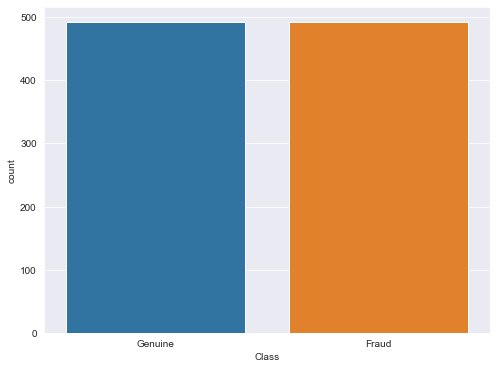

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(x= 'Class', data= undersample_df)
Labels= ('Genuine', 'Fraud')
plt.xticks(range(2), Labels)

So now the data is distributed evenly. Also the correlations are quite visible now. There are some extreme cases where the correlations are maximum in bot positive and negative manners, which declares that the cae is prone to be fraud. 

In [29]:
correlation_undersample_df= undersample_df.corr()

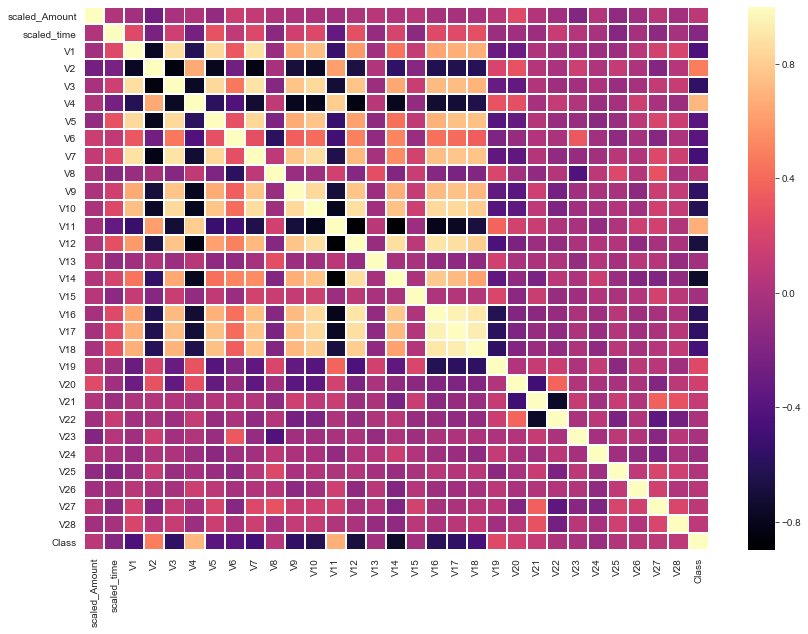

In [30]:
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_undersample_df, cmap="magma", linecolor='white',linewidths=1)

I will present the comparative predictions of the models now.  

### Case 3.1 : Naive bayes using undersampled dataframe

In [31]:
dropped_columns = []
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(undersample_df, dropped_columns)
new_y_pred, new_y_pred_prob = model_predictions(GaussianNB(), new_X_train, new_y_train, new_X_test)
print_metrics(new_y_test,new_y_pred,new_y_pred_prob)

Index(['scaled_Amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'Class'],
      dtype='object')
train set size:  738 
 test set size:  246
fraud transactions in test set:  118
test-set confusion matrix:
 [[124   4]
 [ 14 104]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       128
           1       0.96      0.88      0.92       118

    accuracy                           0.93       246
   macro avg       0.93      0.93      0.93       246
weighted avg       0.93      0.93      0.93       246

ROC AUC: 0.9623609639830508


In [32]:
dropped_columns = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V10','V9','V8']
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(undersample_df, dropped_columns)
new_y_pred, new_y_pred_prob = model_predictions(GaussianNB(), new_X_train, new_y_train, new_X_test)
print_metrics(new_y_test,new_y_pred,new_y_pred_prob)

Index(['scaled_Amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')
train set size:  738 
 test set size:  246
fraud transactions in test set:  118
test-set confusion matrix:
 [[127   1]
 [ 16 102]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       128
           1       0.99      0.86      0.92       118

    accuracy                           0.93       246
   macro avg       0.94      0.93      0.93       246
weighted avg       0.94      0.93      0.93       246

ROC AUC: 0.9746424788135593


### Case 3.2 : XGBoost using undersampled dataframe

In [33]:
dropped_columns = []
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(undersample_df, dropped_columns)
new_y_pred, new_y_pred_prob = model_predictions(XGBClassifier(), new_X_train, new_y_train, new_X_test)
print_metrics(new_y_test,new_y_pred,new_y_pred_prob)

Index(['scaled_Amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'Class'],
      dtype='object')
train set size:  738 
 test set size:  246
fraud transactions in test set:  118
test-set confusion matrix:
 [[123   5]
 [  9 109]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       128
           1       0.96      0.92      0.94       118

    accuracy                           0.94       246
   macro avg       0.94      0.94      0.94       246
weighted avg       0.94      0.94      0.94       246

ROC AUC: 0.9770921610169492


In [34]:
dropped_columns = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V10','V9','V8']
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(undersample_df, dropped_columns)
new_y_pred, new_y_pred_prob = model_predictions(XGBClassifier(), new_X_train, new_y_train, new_X_test)
print_metrics(new_y_test,new_y_pred,new_y_pred_prob)

Index(['scaled_Amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')
train set size:  738 
 test set size:  246
fraud transactions in test set:  118
test-set confusion matrix:
 [[123   5]
 [  9 109]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       128
           1       0.96      0.92      0.94       118

    accuracy                           0.94       246
   macro avg       0.94      0.94      0.94       246
weighted avg       0.94      0.94      0.94       246

ROC AUC: 0.978813559322034


### Case 3.3 : Logistic Regression using undersampled dataframe

In [35]:
dropped_columns = []
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(undersample_df, dropped_columns)
new_y_pred, new_y_pred_prob = model_predictions(LogisticRegression(C = 0.01), new_X_train, new_y_train, new_X_test)
print_metrics(new_y_test,new_y_pred,new_y_pred_prob)

Index(['scaled_Amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'Class'],
      dtype='object')
train set size:  738 
 test set size:  246
fraud transactions in test set:  118
test-set confusion matrix:
 [[118  10]
 [  6 112]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94       128
           1       0.92      0.95      0.93       118

    accuracy                           0.93       246
   macro avg       0.93      0.94      0.93       246
weighted avg       0.94      0.93      0.93       246

ROC AUC: 0.9880164194915253


In [36]:
dropped_columns = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V10','V9','V8']
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(undersample_df, dropped_columns)
new_y_pred, new_y_pred_prob = model_predictions(LogisticRegression(C = 0.01), new_X_train, new_y_train, new_X_test)
print_metrics(new_y_test,new_y_pred,new_y_pred_prob)

Index(['scaled_Amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')
train set size:  738 
 test set size:  246
fraud transactions in test set:  118
test-set confusion matrix:
 [[117  11]
 [  8 110]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       128
           1       0.91      0.93      0.92       118

    accuracy                           0.92       246
   macro avg       0.92      0.92      0.92       246
weighted avg       0.92      0.92      0.92       246

ROC AUC: 0.9866260593220338


In summary, I can say that the expectations are almost fulfilled. The models give a better and wonderful performance in predicting the fraud cases for completely balanced classes. However, for this particular dataset, I have achieved better f1-scores with dropping the features for XGBoost Model.   